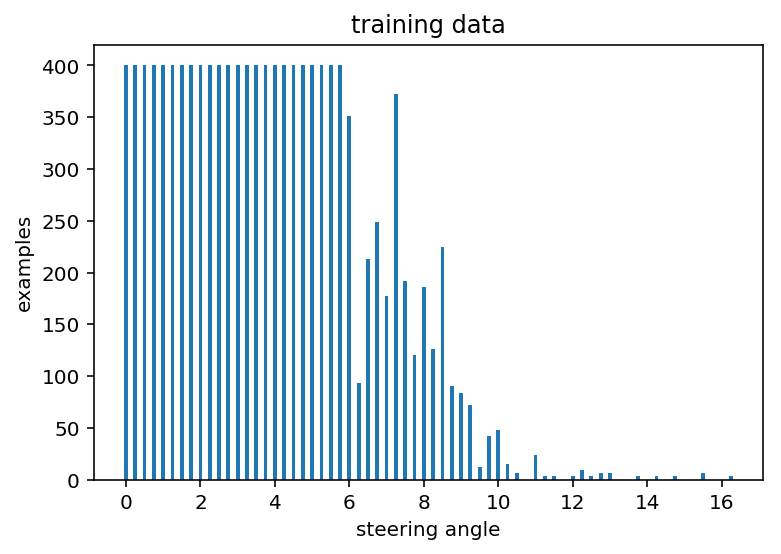

In [157]:
import csv
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

file = './data/6/driving_log.csv'

def read_frames(file):
    with open(file) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            position = float(line[3])
            angle = 0.25 * (abs(position) // 0.01)
            middle,left,right = line[0],line[1],line[2]
            yield (angle, position, middle)
            yield (angle, position - 0.2, left)
            yield (angle, position + 0.2, right)
            
    
frames = list(read_frames(file))

angles = list(map(lambda v : v[0], frames))

keys = list(set(angles))
samples = dict((k, []) for k in keys)

for frame in frames:
    samples[frame[0]].append(frame)

sample_count = 400

picked_frames = []
for key in keys:
    frames = samples[key]
    indicies = np.random.permutation(np.arange(len(frames)))[0:sample_count]
    for ii in indicies:
        picked_frames.append(frames[ii])


picked_angles = list(map(lambda v : v[0], picked_frames))

from collections import Counter as Counter
class_counts = Counter(picked_angles)

y_pos = list(class_counts.values())
x_pos = list(class_counts)



#plt.figure(figsize=(20, 3))
plt.bar(x_pos,y_pos, align='center', width=0.1)
#plt.tight_layout()
plt.xlabel('steering angle')
plt.ylabel('examples')
plt.title('training data')
plt.show()



In [151]:
import random
random.choice([True, False])

True